# Load dataset 

In [2]:
import lib.filedb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_dir = "../../datasets/iphox_gradient_snaps/"
file_df = lib.filedb.get_filedb(dataset_dir + "filedb.tsv")
grad_df = pd.read_hdf(dataset_dir + "gradient_data_distmap.h5")

In [4]:
file_df["dataset"] = pd.to_numeric(file_df["dirname"].str.extract(r".*snaps(\d)/.*", expand=False))

In [5]:
file_df.head()

,path,name,dirname,time,location,strain,dataset
file_id,,,,,,,
0,NaN,delRU_12hr_Column1,BF_12hoursnaps2/12hr_timepoint,12,unknown,jlb088,2
1,NaN,delRU_12hr_Column10,BF_12hoursnaps2/12hr_timepoint,12,unknown,jlb088,2
2,NaN,delRU_12hr_Column2,BF_12hoursnaps2/12hr_timepoint,12,unknown,jlb088,2
3,NaN,delRU_12hr_Column3,BF_12hoursnaps2/12hr_timepoint,12,unknown,jlb088,2
4,NaN,delRU_12hr_Column4,BF_12hoursnaps2/12hr_timepoint,12,unknown,jlb088,2


In [6]:
grad_df.head()

,cdist,pixels,red_bg_mean,red_bg_std,green_bg_mean,green_bg_std,red_raw_mean,red_raw_std,green_raw_mean,green_raw_std,file_id
0,0.25,9800,490.006531,604.122066,625.275102,719.395606,490.006531,604.122066,625.275102,719.395606,0
1,0.50,11109,460.217841,578.170070,603.154919,695.156417,460.217841,578.170070,603.154919,695.156417,0
2,0.75,11243,427.921373,547.630527,587.522903,684.739026,427.921373,547.630527,587.522903,684.739026,0
3,1.00,10855,439.501059,552.178118,594.467434,707.202128,439.501059,552.178118,594.467434,707.202128,0
4,1.25,11376,449.801688,567.195737,598.893108,731.736867,449.801688,567.195737,598.893108,731.736867,0


# Comparing Datasets

In [7]:
def get_subset_of_gradients(file_df, times, datasets):
    df = file_df[(file_df["time"].isin(times) & file_df["dataset"].isin(datasets))]
    return df

In [8]:
def get_figure(ax, df, file_df, chan, times, datasets, plotset):
    t = 96
    for time in times:
        this_time_files = get_subset_of_gradients(file_df, times, datasets).index
        this_time = df[df["file_id"].isin(this_time_files)]
        signals = this_time.groupby("cdist").mean()
        errors = this_time.groupby("cdist").sem()
        error = errors[chan]
        signal = signals[chan]
        color = plt.cm.gist_rainbow(time/t)
        l = ax.plot(signals.index, signal, label="{0} hours".format(time), color = color)
        #l = ax.fill_between(errors.index, signal - error, signal + error, color =color, **plotset)
    return ax

## Mean gradients, dataset compare

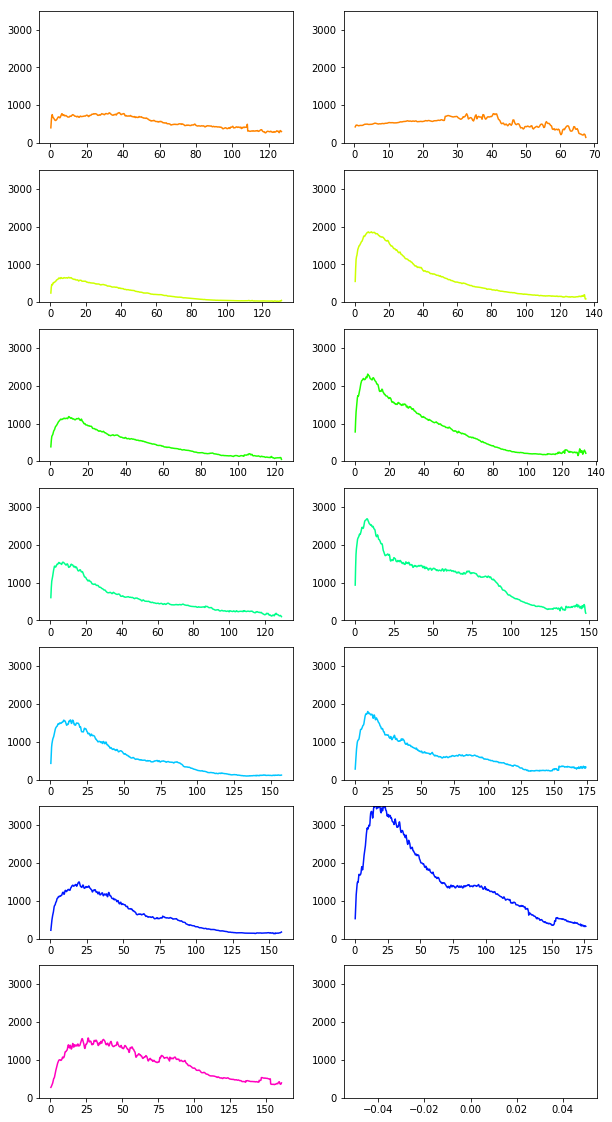

In [9]:
times = file_df["time"].unique()
fig, ax = plt.subplots(len(times),2)
fig.set_size_inches(10,20)

for t, time in enumerate(times):
    for a, ds in enumerate([2,3]):
        plotset = {"linewidth":0.6, "alpha":0.5}
        ax[t, a] = get_figure(ax[t, a], grad_df, file_df, "green_bg_mean", [time], [ds], plotset)
        ax[t,a].set_ylim(0, 3500 )


## Individual gradients

In [25]:
def plot_individual(tax, df, file_df, chan, plotset):
    if len(df) >0:
        df.groupby("file_id").plot(ax=tax, x="cdist", y=chan, **plotset, legend=False)

    return tax

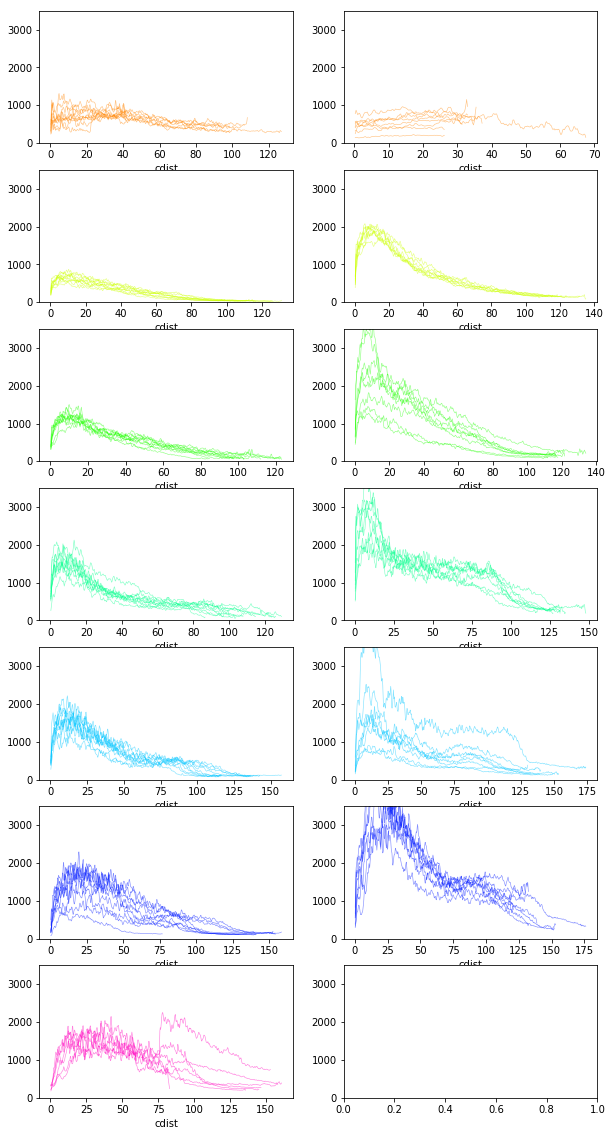

In [26]:
times = file_df["time"].unique()
fig, ax = plt.subplots(len(times),2)
fig.set_size_inches(10,20)

for t, time in enumerate(times):
    for a, ds in enumerate([2,3]):
        plotset = {"linewidth":0.6, "alpha":0.5, "color":plt.cm.gist_rainbow(time/96)}
        this_time_fids = get_subset_of_gradients(file_df, [time], [ds]).index
        this_time = grad_df[grad_df["file_id"].isin(this_time_fids)]
        
        ax[t, a] = plot_individual(ax[t, a], this_time, file_df, "green_bg_mean", plotset)
        ax[t, a].set_ylim(0, 3500 )
